In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

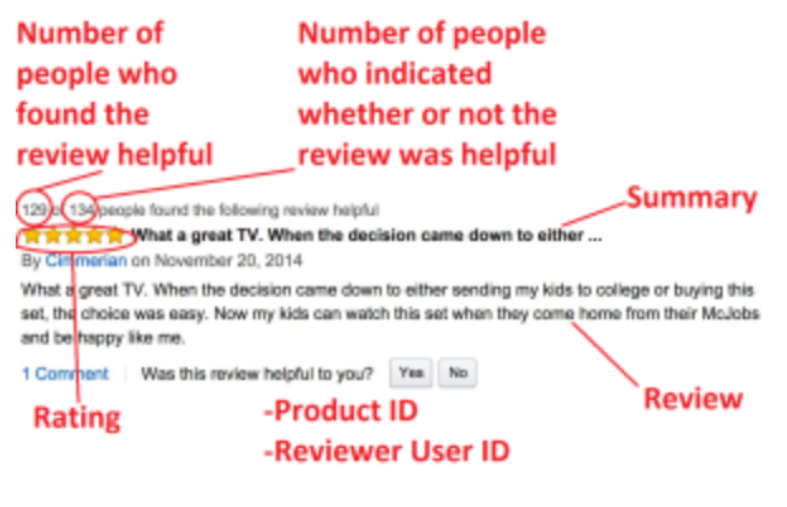

In [289]:
from IPython.display import Image
Image(filename=r'Downloads/amazonscreenshot.png')

**1.. reading data from Sqlite database**

In [291]:
import sqlite3

In [292]:
con = sqlite3.connect(r'Downloads/database.sqlite')  

In [293]:
type(con)

sqlite3.Connection

In [294]:
df= pd.read_sql_query(' select * from REVIEWS', con)

In [295]:
df.shape

(568454, 10)

**2.. Data Preparation !**
Doing basic cleaning/Data wrangling(remove invalid rows , remove duplicate rows ..) & convert "time" feature data-type 
to date-time

In [297]:
type(df)

pandas.core.frame.DataFrame

In [298]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [299]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [300]:
df[df['HelpfulnessNumerator']<= df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [301]:
df_valid=df[df['HelpfulnessNumerator']<= df['HelpfulnessDenominator']]

In [302]:
df_valid.shape

(568452, 10)

In [303]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [304]:
df_valid.duplicated(['ProductId', 'UserId','Time', 'Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [305]:
df_valid[df_valid.duplicated(['ProductId', 'UserId','Time', 'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
2336,2337,B0001FQVCK,A5D06XJHDXK75,C. Po,1,1,5,1190592000,"Baci's are pure heaven - great gift, stocking ...",My family has been in love with Baci's ever si...
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,2,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,4,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...
2946,2947,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,0,1,1,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...
...,...,...,...,...,...,...,...,...,...,...
562273,562274,B004HOSGWE,A1TMAVN4CEM8U8,Gunner,1,1,5,1336348800,My 7th favorite flavor,Diamond Almonds<br />Almonds are a good source...
567958,567959,B0030VJ8YU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...
568008,568009,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",3,3,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...
568017,568018,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2,2,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...


In [306]:
data = df_valid.drop_duplicates(subset=['ProductId', 'UserId','Time', 'Text'])

In [307]:
data.shape

(567247, 10)

In [308]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [309]:
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 567247, dtype: datetime64[ns]

In [310]:
data['Time'] =pd.to_datetime(data['Time'], unit= 's')

In [311]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [312]:
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 567247, dtype: datetime64[ns]

**3.. Analyse to what User Amazon Can recommend more product**
#Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement

In [314]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

data['UserId'].nunique()

In [316]:
data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'})

### Since we want features as : 'Number_of_summaries','number_of_text','Avg_score','Number_of_products_purchased'
## Hence calling above aggregations makes sense :

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [317]:
recommend_df=data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by='ProductId', ascending=False)

In [318]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,442,442,4.529412,442
A1YUL9PCJR3JTY,412,412,4.490291,412
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HRM5D802WYYZ,1,1,5.000000,1
A2HRN5PLORHK6E,1,1,5.000000,1
A2HRNC10AGMVPC,1,1,5.000000,1


In [319]:
recommend_df.columns= ['Number_of_summaries', 'num_text', 'avg_score', 'No_of_prods_purchased']

In [320]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
A3OXHLG6DIBRW8,442,442,4.529412,442
A1YUL9PCJR3JTY,412,412,4.490291,412
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HRM5D802WYYZ,1,1,5.000000,1
A2HRN5PLORHK6E,1,1,5.000000,1
A2HRNC10AGMVPC,1,1,5.000000,1


In [321]:
recommend_df.index[0:10]

Index(['A3OXHLG6DIBRW8', 'A1YUL9PCJR3JTY', 'AY12DBB0U420B', 'A281NPSIMI1C2R',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A1TMAVN4CEM8U8', 'AQQLWCMRNDFGI',
       'A2SZLNSI5KOQJT', 'AZV26LP92E6WU'],
      dtype='object', name='UserId')

In [322]:
recommend_df['No_of_prods_purchased'][0:10]

UserId
A3OXHLG6DIBRW8    442
A1YUL9PCJR3JTY    412
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A2MUGFV2TDQ47K    201
A1TMAVN4CEM8U8    181
AQQLWCMRNDFGI     176
A2SZLNSI5KOQJT    175
AZV26LP92E6WU     167
Name: No_of_prods_purchased, dtype: int64

In [323]:
recommend_df['No_of_prods_purchased'][0:10].values

array([442, 412, 389, 365, 256, 201, 181, 176, 175, 167], dtype=int64)

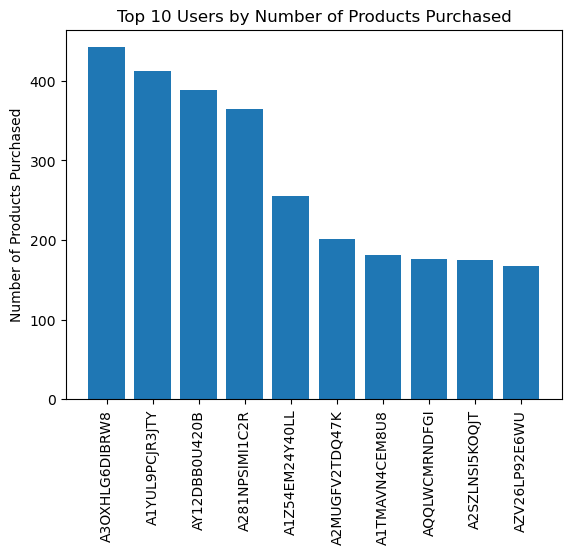

In [324]:
plt.bar(recommend_df.index[0:10], recommend_df['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Products Purchased')
plt.title('Top 10 Users by Number of Products Purchased')
plt.show()

In [325]:
'''
Inference : These are the Top 10 Users so we can recommend more & more Products to these User Id 
            as there will be a high probability that these person are going to be buy more
            
'''

'\nInference : These are the Top 10 Users so we can recommend more & more Products to these User Id \n            as there will be a high probability that these person are going to be buy more\n            \n'

**4.. which product has good number of reviews ?** 

In [327]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [328]:
data['ProductId'].nunique()

74258

In [329]:
prod_count= data['ProductId'].value_counts().to_frame()

In [330]:
prod_count


,count
ProductId,
B007JFMH8M,913
B002QWHJOU,630
B002QWP89S,630
B002QWP8H0,630
B0026RQTGE,630
...,...
B0058FN5CM,1
B0047435DO,1
B004DSPTTM,1


In [331]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,913
B002QWHJOU,630
B002QWP89S,630
B002QWP8H0,630
B0026RQTGE,630
B003B3OOPA,623
B001EO5Q64,567
B001RVFEP2,562
B0013NUGDE,562


In [332]:
freq_prod_ids=prod_count[prod_count['count']>500].index

In [333]:
freq_prod_ids

Index(['B007JFMH8M', 'B002QWHJOU', 'B002QWP89S', 'B002QWP8H0', 'B0026RQTGE',
       'B003B3OOPA', 'B001EO5Q64', 'B001RVFEP2', 'B0013NUGDE', 'B006HYLW32',
       'B000VK8AVK', 'B0026KNQSA', 'B007M832YY', 'B007M83302', 'B0026KPDG8',
       'B001RVFERK', 'B000KV61FC', 'B000KV7ZGQ', 'B000NMJWZO', 'B000UBD88A',
       'B0013A0QXC', 'B005K4Q37A', 'B005K4Q34S', 'B005K4Q4LK', 'B005K4Q1YA',
       'B0090X8IPM', 'B003GTR8IO', 'B005ZBZLT4', 'B007Y59HVM'],
      dtype='object', name='ProductId')

In [334]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 567247, dtype: bool

In [335]:
data[data['ProductId'].isin(freq_prod_ids)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [336]:
freq_prod_df=data[data['ProductId'].isin(freq_prod_ids)]

In [337]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [338]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

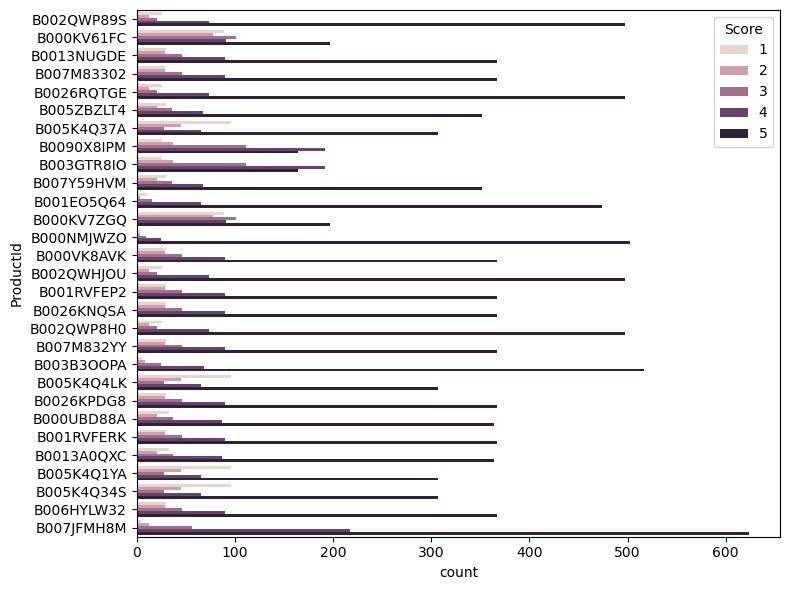

In [339]:
plt.figure(figsize=(8,6))
sns.countplot(y= 'ProductId', data=freq_prod_df, hue='Score' )
plt.tight_layout()

**5.. Is there any difference between behaviour of frequent viewers & not frequent viewers ?**

In [ ]:
'''

First lets understand who are frequent viewers & who are not frequent viewers ..

Frequent viewers are those who have bought products atleast 50 times or more ..
Non-Frequent viewers are those who have bought products less than 50 times 


'''

In [340]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [341]:
x=data['UserId'].value_counts()

In [342]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [343]:
data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: UserId, Length: 567247, dtype: object

In [344]:
data['viewer_type']=data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

In [345]:
x

UserId
A3OXHLG6DIBRW8    442
A1YUL9PCJR3JTY    412
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
APKQBK5EAZ6BV       1
A31ZSRLG55BLRH      1
A2YQH34KFB65BR      1
A14AMMHQ1EA52K      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [346]:
x['A3OXHLG6DIBRW8']    

442

In [347]:
data.head(3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [348]:
type('viewer_type')

str

In [349]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [350]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [351]:
data['viewer_type']=='Not Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 567247, dtype: bool

In [352]:
data[data['viewer_type']=='Not Frequent']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent


In [353]:
not_freq_df=data[data['viewer_type']=='Not Frequent']

In [354]:
not_freq_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent


In [355]:
freq_df=data[data['viewer_type']=='Frequent']

In [356]:
freq_df['Score'].value_counts()

Score
5    12827
4     4628
3     2284
2     1002
1      961
Name: count, dtype: int64

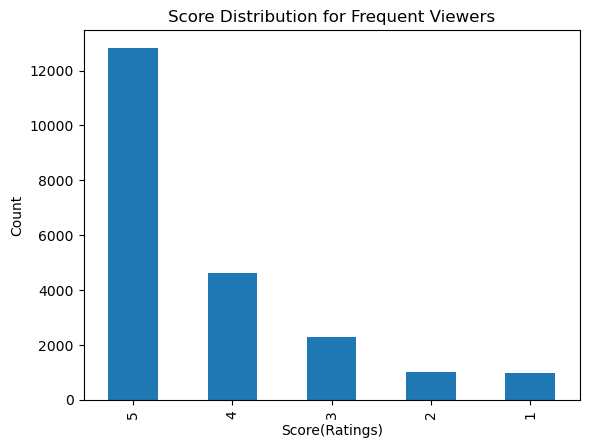

In [483]:
freq_df['Score'].value_counts().plot(kind='bar')
plt.xlabel('Score(Ratings)')
plt.ylabel('Count')
plt.title('Score Distribution for Frequent Viewers')
plt.grid(False) 

In [ ]:
'''
The distribution of ratings among frequent reviewers is similar to that of all reviews. 
However, we can see that frequent reviewers give less 5-star reviews and less 1-star review.
Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.

'''

**6.. Are frequent users more verbose ? ( ie someone who speaks or post alot )**

data.columns

In [359]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [360]:
len(data['Text'][2])

509

In [361]:
type(data['Text'][0])

str

In [362]:
def calculate_length(text):
    return len(text.split(' '))

In [363]:
data['Text'].apply(calculate_length)

0         49
1         31
2         99
3         43
4         30
          ..
568449    26
568450    46
568451    71
568452    37
568453    21
Name: Text, Length: 567247, dtype: int64

In [364]:
data['Text_lenght']=data['Text'].apply(calculate_length)

In [365]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [366]:
not_freq_data=data[data['viewer_type']=='Not Frequent']
freq_data=data[data['viewer_type']=='Frequent']

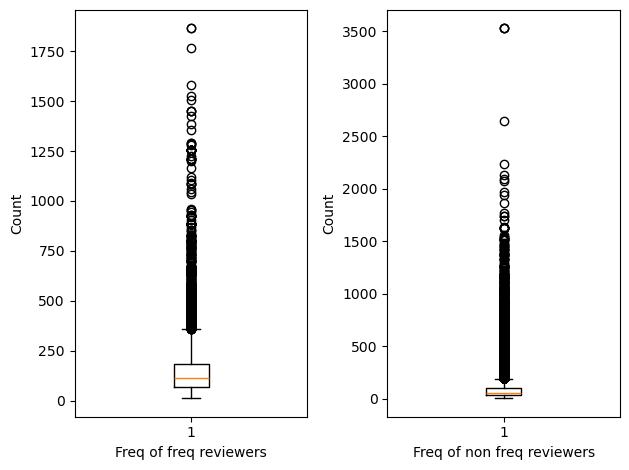

In [367]:
fig= plt.figure()

ax1= fig.add_subplot(121)
ax1.boxplot(freq_data['Text_lenght'])
plt.ylabel('Count')
plt.xlabel('Freq of freq reviewers')
      

ax2=fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_lenght'])
plt.ylabel('Count')
plt.xlabel('Freq of non freq reviewers')
plt.tight_layout()      

In [ ]:
'''

 boxplot basically gives us 25th percentile , 50th percentile(median) , 75th percentile & 
 whiskers may be defined in different ways in different tools & packages..

sometimes it shows 99th percentile & 1 percentile value for different package 
sometimes it shows min & max value for different package ..


'''

In [ ]:
'''
Conclusion : 

The distributions of word counts for frequent and infrequent reviews shows that 
infrequent reviewers have a large amount of reviews of low word count.
On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. 



'''

**7.. sentiment analysis !**

What is sentiment analysis?
Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
Some examples of applications for sentiment analysis include:

1. Analyzing the social media discussion around a certain topic
2. Evaluating survey responses
3. Determining whether product reviews are positive or negative

In [368]:
!pip install textblob

In [369]:
from textblob import TextBlob

In [370]:
data['Summary'][0]

'Good Quality Dog Food'

In [371]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [372]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [373]:
data.shape

(567247, 12)

In [374]:
sample= data[0:50000]

In [375]:
polarity= []

for text in sample['Summary']:
    try:
         polarity.append(TextBlob(text).sentiment.polarity)
    except:
          polarity.append(0)

In [376]:
len(polarity)

50000

In [377]:
sample['polarity']= polarity

In [378]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_lenght,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [379]:
sample_positive=sample[sample['polarity']>0]
sample_negative=sample[sample['polarity']<0]

In [380]:
sample_positive['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
50079                      good product - great deal !
50080          They taste fine but I won't order again
50081                                     Outstanding!
50083                                     She Loved It
50084                                        delicious
Name: Summary, Length: 29137, dtype: object

In [381]:
from collections import Counter

In [382]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 204),
 ('Delicious', 195),
 ('Great product', 96),
 ('Great', 83),
 ('Love it!', 81),
 ('Excellent', 78),
 ('Great Product', 74),
 ('Great!', 67),
 ('Good stuff', 53),
 ('Awesome', 52)]

In [383]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 43),
 ('Disappointing', 32),
 ('Bland', 20),
 ('Awful', 18),
 ('Not what I expected', 17),
 ('Terrible', 17),
 ('disappointed', 17),
 ('Horrible', 14),
 ('Disgusting', 12),
 ("Don't waste your money", 11)]